In [0]:
%matplotlib inline

In [3]:
# Import packages
!pip install POT

     |████████████████████████████████| 430kB 3.4MB/s 



# OT for image color adaptation


This example presents a way of transferring colors between two image
with Optimal Transport as introduced in [6]

[6] Ferradans, S., Papadakis, N., Peyre, G., & Aujol, J. F. (2014).
Regularized discrete optimal transport.
SIAM Journal on Imaging Sciences, 7(3), 1853-1882.



In [0]:
# Authors: Remi Flamary <remi.flamary@unice.fr>
#          Stanislas Chambon <stan.chambon@gmail.com>
#
# License: MIT License

import numpy as np
from scipy import ndimage
import matplotlib.pylab as pl
import ot


r = np.random.RandomState(42)


def im2mat(I):
    """Converts and image to matrix (one pixel per line)"""
    return I.reshape((I.shape[0] * I.shape[1], I.shape[2]))


def mat2im(X, shape):
    """Converts back a matrix to an image"""
    return X.reshape(shape)


def minmax(I):
    return np.clip(I, 0, 1)

In [5]:
import os
os.getcwd()

'/content'

Generate data
-------------
**Exercise** Upload you own images using the Files tab to the left and replace values of the **image1** and **image2** variables with your own file names. <br/> Make sure that both images have the same dimensions. <br/>Afterwards transfer the colors between the two image using the provided code. <br/> Observe the results and comment on what you have understood from this optimal transport example.



In [0]:
image1 = 'image1.jpg'
image2 = 'image2.jpg'

# Loading images
I1 = pl.imread(image1).astype(np.float64) / 256
I2 = pl.imread(image2).astype(np.float64) / 256

X1 = im2mat(I1)
X2 = im2mat(I2)

# training samples
nb = 1000
idx1 = r.randint(X1.shape[0], size=(nb,))
idx2 = r.randint(X2.shape[0], size=(nb,))

Xs = X1[idx1, :]
Xt = X2[idx2, :]

Plot original image
-------------------



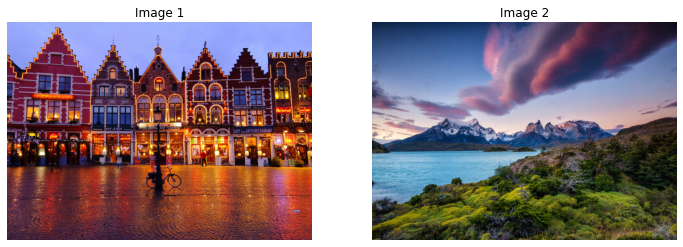

In [9]:
pl.figure(1, figsize=(12, 6))

pl.subplot(1, 2, 1)
pl.imshow(I1)
pl.axis('off')
pl.title('Image 1')

pl.subplot(1, 2, 2)
pl.imshow(I2)
pl.axis('off')
pl.title('Image 2');

Scatter plot of colors
----------------------



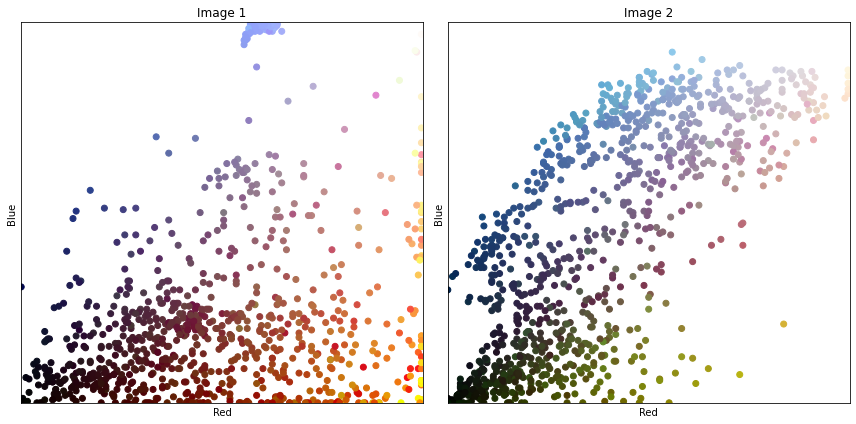

In [10]:
pl.figure(2, figsize=(12, 6))

pl.subplot(1, 2, 1)
pl.scatter(Xs[:, 0], Xs[:, 2], c=Xs)
pl.axis([0, 1, 0, 1])
pl.xlabel('Red')
pl.ylabel('Blue')
pl.xticks([])
pl.yticks([])
pl.title('Image 1')

pl.subplot(1, 2, 2)
pl.scatter(Xt[:, 0], Xt[:, 2], c=Xt)
pl.axis([0, 1, 0, 1])
pl.xlabel('Red')
pl.ylabel('Blue')
pl.xticks([])
pl.yticks([])
pl.title('Image 2')
pl.tight_layout()
pl.savefig("figure1.png")

Instantiate the different transport algorithms and fit them
-----------------------------------------------------------



In [0]:
# Parameters
# Entropic regularization term
reg_e_a = 1e-1 
reg_e_b = 1 

# EMD (Earth Mover's Distance) Transport
ot_emd = ot.da.EMDTransport()
ot_emd.fit(Xs=Xs, Xt=Xt)

# SinkhornTransport
# regulirization term a
ot_sinkhorn_a = ot.da.SinkhornTransport(reg_e_a)
ot_sinkhorn_a.fit(Xs=Xs, Xt=Xt)
# regulirization term b
ot_sinkhorn_b = ot.da.SinkhornTransport(reg_e_b)
ot_sinkhorn_b.fit(Xs=Xs, Xt=Xt)

# prediction between images (using out of sample prediction as in [6])
transp_Xs_emd = ot_emd.transform(Xs=X1)
transp_Xt_emd = ot_emd.inverse_transform(Xt=X2)

# regulirization term a
transp_Xs_sinkhorn_a = ot_sinkhorn_a.transform(Xs=X1)
transp_Xt_sinkhorn_a = ot_sinkhorn_a.inverse_transform(Xt=X2)
# regulirization term b
transp_Xs_sinkhorn_b = ot_sinkhorn_b.transform(Xs=X1)
transp_Xt_sinkhorn_b = ot_sinkhorn_b.inverse_transform(Xt=X2)

I1t = minmax(mat2im(transp_Xs_emd, I1.shape))
I2t = minmax(mat2im(transp_Xt_emd, I2.shape))

# regulirization term a
I1te_a = minmax(mat2im(transp_Xs_sinkhorn_a, I1.shape))
I2te_a = minmax(mat2im(transp_Xt_sinkhorn_a, I2.shape))

# regulirization term b
I1te_b = minmax(mat2im(transp_Xs_sinkhorn_b, I1.shape))
I2te_b = minmax(mat2im(transp_Xt_sinkhorn_b, I2.shape))

Plot new images
---------------



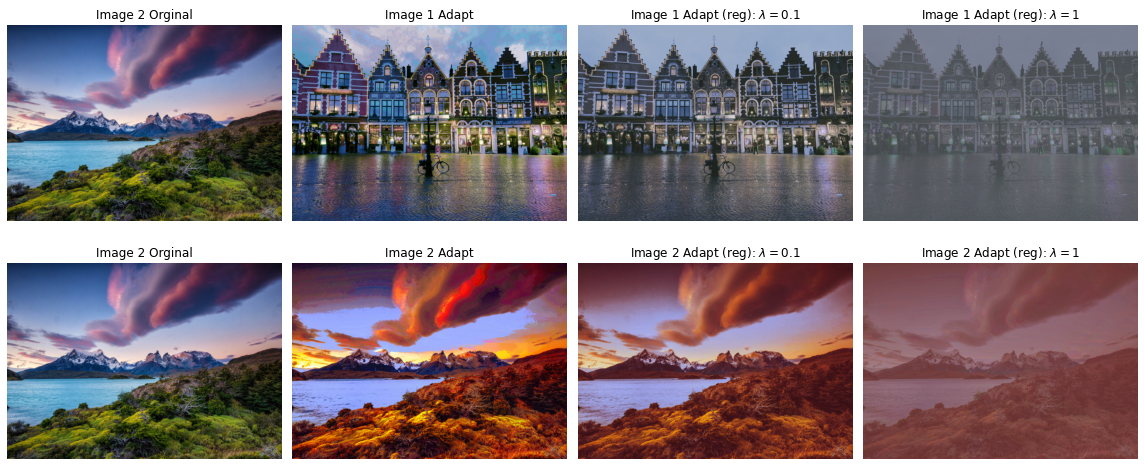

In [47]:
pl.figure(8, figsize=(16, 7))


pl.subplot(2, 4, 1)
pl.imshow(I2)
pl.axis('off')
pl.title('Image 2 Orginal')

pl.subplot(2, 4, 2)
pl.imshow(I1t)
pl.axis('off')
pl.title('Image 1 Adapt')

pl.subplot(2, 4, 3)
pl.imshow(I1te_a)
pl.axis('off')
pl.title(r'Image 1 Adapt (reg): $\lambda=0.1$')

pl.subplot(2, 4, 4)
pl.imshow(I1te_b)
pl.axis('off')
pl.title(r'Image 1 Adapt (reg): $\lambda=1$')

pl.subplot(2, 4, 5)
pl.imshow(I2)
pl.axis('off')
pl.title('Image 2 Orginal')

pl.subplot(2, 4, 6)
pl.imshow(I2t)
pl.axis('off')
pl.title('Image 2 Adapt')

pl.subplot(2, 4, 7)
pl.imshow(I2te_a)
pl.axis('off')
pl.title(r'Image 2 Adapt (reg): $\lambda=0.1$')

pl.subplot(2, 4, 8)
pl.imshow(I2te_b)
pl.axis('off')
pl.title(r'Image 2 Adapt (reg): $\lambda=1$')

pl.tight_layout()
pl.savefig("figure1.png")